In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
123727,k8704ru,주말 애니 건담,시청자 117명,Sexy Sniper,2022-10-06 10:10:06.125679
123728,포요_ (podopoyo),24시간 방송 중! (+11:05:55),시청자 115명,League of Legends,2022-10-06 10:10:06.125679
123729,고먐잉 (rhaia11),목요일,시청자 111명,Just Chatting,2022-10-06 10:10:06.125679
123730,폭스발리다경이 (qwer01351),★발리 폭스 다경이네★24시간 #발리 #폭스 #다경이네 #홀짝 #벽치기 #한라백두...,시청자 110명,Lineage: The Blood Pledge,2022-10-06 10:10:06.125679
123731,킹설아 (kingseola),안녕하세요 휴가 끝난 킹설아,시청자 110명,Just Chatting,2022-10-06 10:10:06.125679


In [3]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [4]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [5]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
119983,한동숙 (handongsuk),롤 골드(진),1만,League of Legends,2022-10-06 03:55:05.924029
120032,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,1.2만,Zero Sievert,2022-10-06 04:00:05.405971
120082,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,1.2만,Zero Sievert,2022-10-06 04:05:05.981473
120132,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,1.2만,Zero Sievert,2022-10-06 04:10:05.330440


In [6]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0         14500.0
49        14500.0
50        10500.0
98        14500.0
99        10500.0
           ...   
119983    10500.0
120032    12500.0
120082    12500.0
120132    12500.0
120182    11500.0
Name: 시청자수, Length: 4350, dtype: float64

In [7]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [8]:
df.loc[df2.index, '시청자수'] = df2

In [9]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [10]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [11]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0         14500.0
1            9687
2            9491
3            8103
4            8098
           ...   
123727        117
123728        115
123729        111
123730        110
123731        110
Name: 시청자수, Length: 123710, dtype: object

In [12]:
df['시청자수'] = df['시청자수'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 123731
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      123710 non-null  object
 1   제목      123710 non-null  object
 2   시청자수    123710 non-null  int32 
 3   카테고리    123710 non-null  object
 4   일시      123710 non-null  object
dtypes: int32(1), object(4)
memory usage: 5.2+ MB


In [14]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [15]:
df1 = df

In [16]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,27222.922099
우왁굳 (woowakgood),17052.023058
한동숙 (handongsuk),15536.473623
enchantenter,15408.673152
풍월량 (hanryang1125),15090.206946
아이네_ (vo_ine),14132.648515
침착맨 (zilioner),11684.607143
릴파_ (lilpaaaaaa),11220.189744
valorant_kr,10415.678571


In [17]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
녹두로 (nokduro),전문 폴가이스 방송 ㅇㅅㅇ;;,4240,Fall Guys,2022-10-06 01:00:05.458815
녹두로 (nokduro),전문 폴가이스 방송 ㅇㅅㅇ;;,4438,Fall Guys,2022-10-06 01:05:05.482236
녹두로 (nokduro),전문 폴가이스 방송 ㅇㅅㅇ;;,4090,Fall Guys,2022-10-06 01:10:06.021096


In [18]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '녹두로 (nokduro)', '녹두로 (nokduro)', '녹두로 (nokduro)', '녹두로 (nokduro)',
       '녹두로 (nokduro)', '녹두로 (nokduro)', '녹두로 (nokduro)', '녹두로 (nokduro)',
       '녹두로 (nokduro)', '녹두로 (nokduro)'],
      dtype='object', name='이름', length=7932)

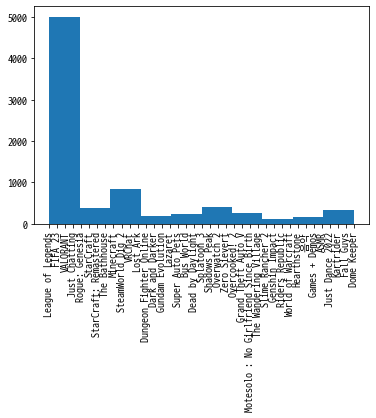

In [19]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [20]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
119982,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,12500,Zero Sievert,2022-10-06 03:55:05.924029
120032,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,12500,Zero Sievert,2022-10-06 04:00:05.405971
120082,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,12500,Zero Sievert,2022-10-06 04:05:05.981473
120132,풍월량 (hanryang1125),2D 타르코프?? ZERO Sievert 풍월량,12500,Zero Sievert,2022-10-06 04:10:05.330440


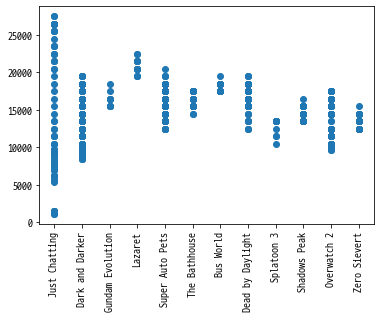

In [21]:
plt.xticks(rotation="vertical")
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([214.,  10.,  14., 102.,  27.,  36.,  89.,  29.,  43., 127.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

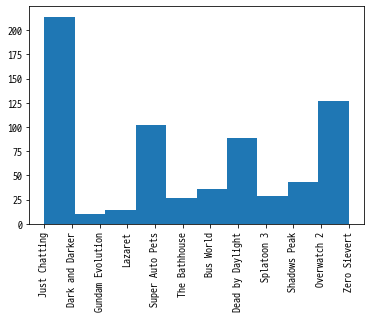

In [22]:
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'])

In [23]:
df_p['카테고리'].value_counts()

Dark and Darker     139
Overwatch 2         103
Super Auto Pets     102
Dead by Daylight     89
Just Chatting        75
Shadows Peak         43
Bus World            36
Splatoon 3           29
The Bathhouse        27
Zero Sievert         24
Lazaret              14
Gundam Evolution     10
Name: 카테고리, dtype: int64

### 시간대별로 집계할 수 있도록 전처리하자